### Retrieval performance
We compare the performance of the Xception and CLIP ViT models in terms of top-k accuracy.

In [1]:
from dataset import Street2ShopImageSimilarityTestDataset, evaluate_top_k_accuracies
from models.xception import XceptionModel
from models.clip_vit import CLIPViTModel
import random

num_samples = 100
vis_num_samples = 5

/home/shopping-image-search/virtual/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

# Visualize example results
def plot_retrieval_results(dataset, query_idx, retrieved_indices, num_results=5):
    """
    Plot the query street photo and its top retrieved shop photos
    
    Args:
        dataset: The test dataset instance
        query_idx: Index of the query street photo
        retrieved_indices: List of indices for retrieved shop photos
        num_results: Number of top results to show
    """
    # Get query image
    query_item = dataset.test_dataset[query_idx]
    query_image = query_item['street_photo_image']
    
    # Get retrieved images
    retrieved_images = []
    for idx in retrieved_indices[:num_results]:
        retrieved_item = dataset.test_dataset[idx]
        retrieved_images.append(retrieved_item['shop_photo_image'])
    
    # Create subplot
    fig = plt.figure(figsize=(15, 3))
    
    # Plot query image
    plt.subplot(1, num_results + 1, 1)
    plt.imshow(query_image)
    plt.title('Query\n(Street Photo)')
    plt.axis('off')
    
    # Plot retrieved images
    for i, img in enumerate(retrieved_images, 1):
        plt.subplot(1, num_results + 1, i + 1)
        plt.imshow(img)
        plt.title(f'Top-{i}\n(Shop Photo)')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [3]:
embedding_dim = 512

model = XceptionModel(embedding_dim=embedding_dim)
model.load(f'saved_models/weights/xception-{embedding_dim}.pt')
test_dataset = Street2ShopImageSimilarityTestDataset(model, ratio=0.6)
print(len(test_dataset))
print(test_dataset[0])

# Randomly select indices from the test dataset
query_indices = random.sample(range(len(test_dataset)), num_samples)
vis_indices = random.sample(query_indices, vis_num_samples)

xception_accuracies, xception_visualization_data = evaluate_top_k_accuracies(test_dataset, query_indices, vis_indices)

Initializing xception on device: cuda..


/home/shopping-image-search/virtual/lib/python3.10/site-packages/timm/models/_factory.py:126: UserWarning: Mapping deprecated model name xception to current legacy_xception.
  model = create_fn(
/home/shopping-image-search/models/base.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full

Model weights loaded from saved_models/weights/xception-512.pt
Loading dataset from street2shop_test_0.6...
Creating FAISS index...
Index creation time: 0.00 seconds


Indexing shop images:  78%|███████▊  | 100/129 [15:26<03:41,  7.64s/it]/home/shopping-image-search/virtual/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99272481 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Indexing shop images: 100%|██████████| 129/129 [17:42<00:00,  8.23s/it]


Saving FAISS index to s2s_test_0.6_xception512.faiss...
16414
{'street_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3648x5472 at 0x7FAE10FAEF50>, 'shop_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=913x1304 at 0x7FAE10FAE4A0>, 'index': 0}
Example retrievals from Xception model:


TypeError: 'int' object is not subscriptable

Example retrievals from Xception model:
9046 [8713, 1047, 3969, 14968, 13818, 10512, 5693, 8830, 5667, 9185]


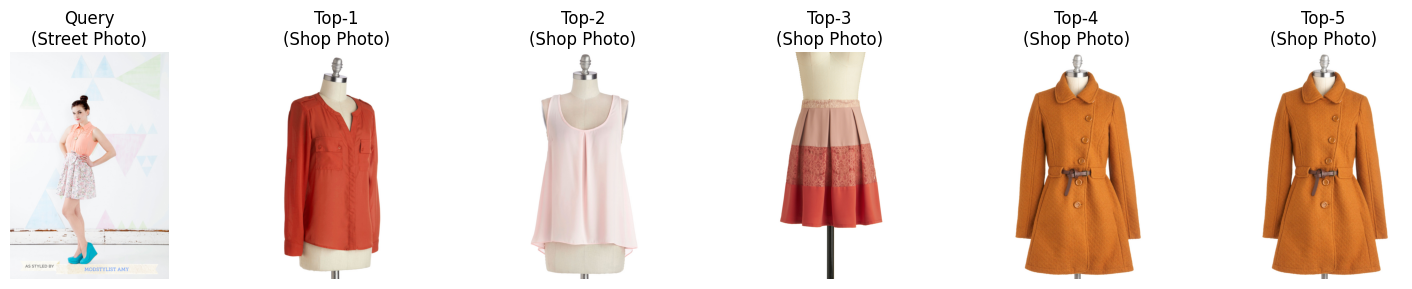

--------------------------------------------------------------------------------
8648 [3565, 1644, 4086, 239, 2169, 2700, 7637, 8652, 4896, 4139]


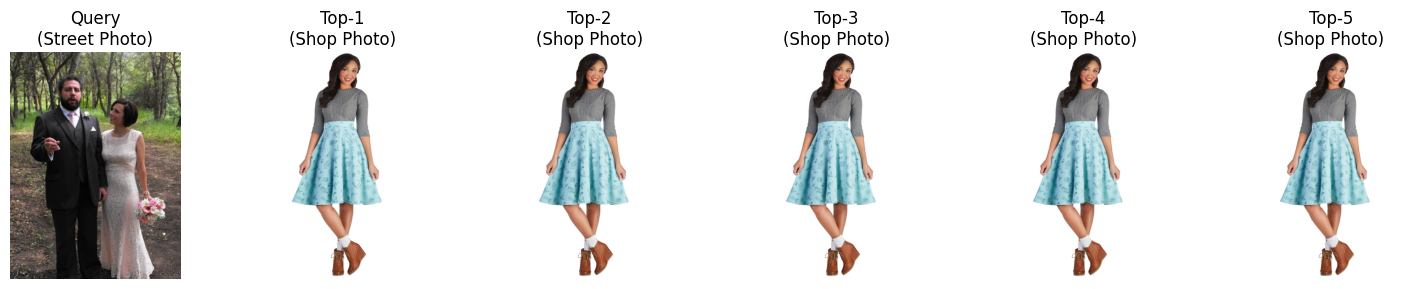

--------------------------------------------------------------------------------
350 [11796, 6835, 8992, 5648, 11039, 6348, 11296, 12426, 6026, 4264]


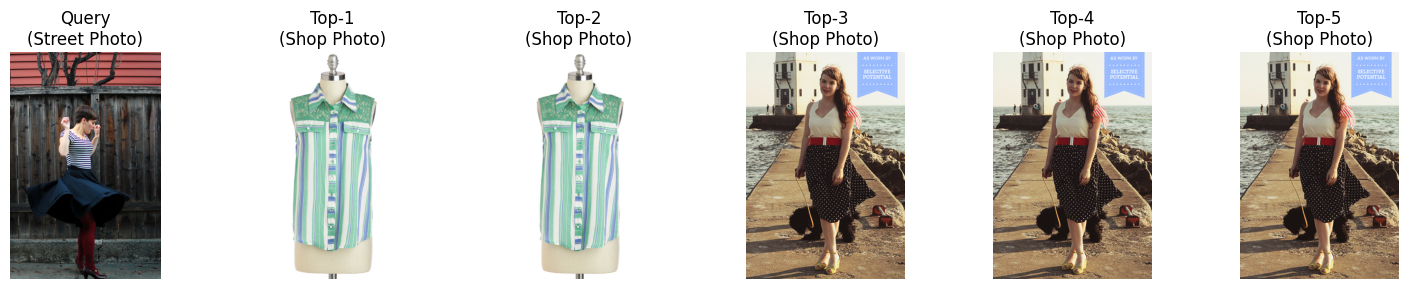

--------------------------------------------------------------------------------


In [10]:
# print(xception_visualization_data)

# Display a few example retrievals
print("Example retrievals from Xception model:")
for query_idx, retrieved_indices in xception_visualization_data[:3]:
    print(query_idx, retrieved_indices)
    plot_retrieval_results(test_dataset, query_idx, retrieved_indices)
    print("-" * 80)

del model, test_dataset, xception_visualization_data

Initializing clip-vit-b-32 on device: cuda..


/home/shopping-image-search/models/clip_vit.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=self.device)


Model weights loaded from saved_models/weights/clip-vit-b-32-512.pt
Loading dataset from street2shop_test_0.6...
Creating FAISS index...
Index creation time: 0.00 seconds


Indexing shop images:  78%|███████▊  | 100/129 [13:07<02:23,  4.94s/it]/home/shopping-image-search/virtual/lib/python3.10/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99272481 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Indexing shop images: 100%|██████████| 129/129 [15:25<00:00,  7.18s/it]


Saving FAISS index to s2s_test_0.6_clip-vit-b-32512.faiss...
16414
{'street_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3648x5472 at 0x7FADE5609720>, 'shop_photo_image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=913x1304 at 0x7FADE56094E0>, 'index': 0}

Example retrievals from CLIP ViT model:


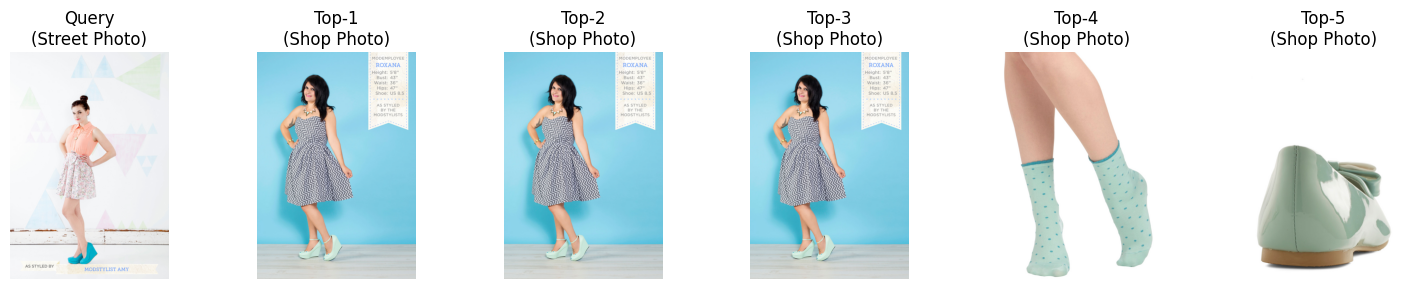

--------------------------------------------------------------------------------


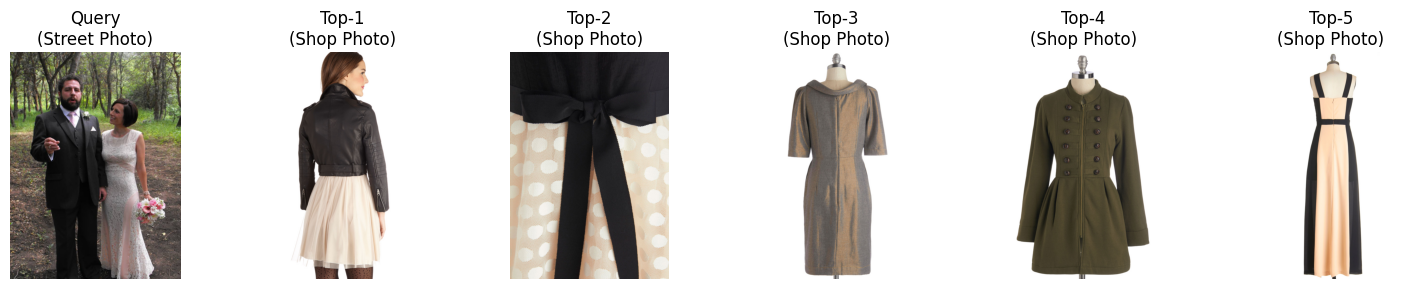

--------------------------------------------------------------------------------


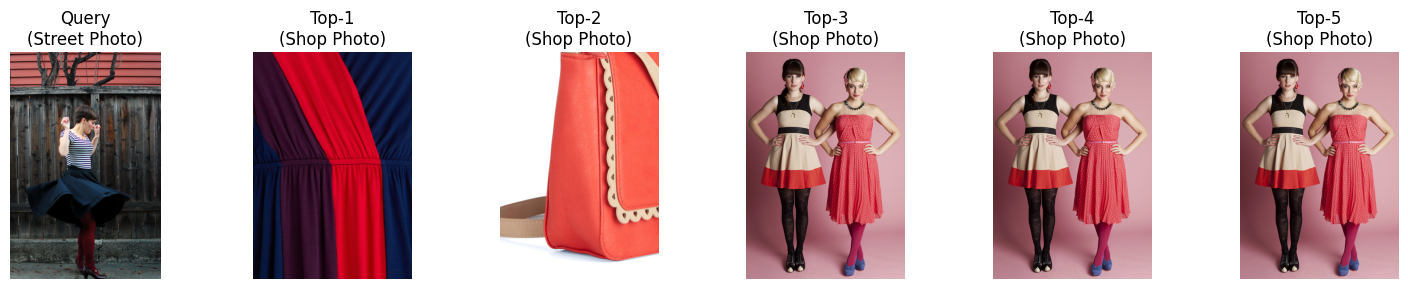

--------------------------------------------------------------------------------


In [11]:
model = CLIPViTModel(embedding_dim=embedding_dim)
model.load(f'saved_models/weights/clip-vit-b-32-{embedding_dim}.pt')
test_dataset = Street2ShopImageSimilarityTestDataset(model, ratio=0.6)
print(len(test_dataset))
print(test_dataset[0])

clipvit_accuracies, clipvit_visualization_data = evaluate_top_k_accuracies(test_dataset, query_indices, vis_indices)

print("\nExample retrievals from CLIP ViT model:")
for query_idx, retrieved_indices in clipvit_visualization_data[:3]:
    plot_retrieval_results(test_dataset, query_idx, retrieved_indices)
    print("-" * 80)
    
# del model, test_dataset, clipvit_visualization_data
del model, clipvit_visualization_data

{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.0, 'top_5_accuracy': 0.01, 'top_10_accuracy': 0.01}
{'top_1_accuracy': 0.0, 'top_3_accuracy': 0.01, 'top_5_accuracy': 0.01, 'top_10_accuracy': 0.01}


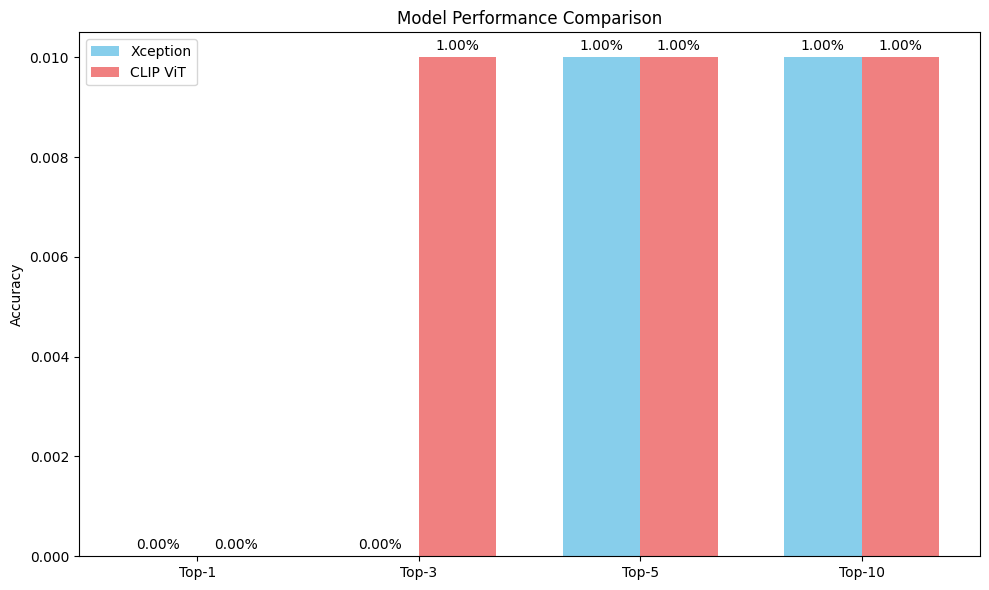

In [14]:
import matplotlib.pyplot as plt
import numpy as np

print(xception_accuracies)
print(clipvit_accuracies)

# Extract accuracy values
metrics = ['top_1_accuracy', 'top_3_accuracy', 'top_5_accuracy', 'top_10_accuracy']
xception_values = [xception_accuracies[m] for m in metrics]
clipvit_values = [clipvit_accuracies[m] for m in metrics]

# Set up bar positions
x = np.arange(len(metrics))
width = 0.35  # Width of bars

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
rects1 = ax.bar(x - width/2, xception_values, width, label='Xception', color='skyblue')
rects2 = ax.bar(x + width/2, clipvit_values, width, label='CLIP ViT', color='lightcoral')

# Customize plot
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Top-1', 'Top-3', 'Top-5', 'Top-10'])
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2%}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

### Pipeline to enhance retrieval performance
Now we will build a pipeline to enhance the retrieval performance. Inspired by Pinterest image search pipeline.

In [1]:
import json
import torch
from tqdm import tqdm
import torchvision.transforms as transforms
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from sentence_transformers import SentenceTransformer
import faiss
import time

from dataset import Street2ShopImageSimilarityTestDataset

test_dataset = Street2ShopImageSimilarityTestDataset(ratio=0.6)

device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16  # Use mixed precision for speed

blip_processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
blip_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=dtype, device_map=device)
print("BLIP-2 model and processor loaded successfully.")

def get_text_caption(image):
    inputs = blip_processor(images=image, return_tensors="pt").to(device, dtype=dtype)
    caption_ids = blip_model.generate(**inputs)
    caption = blip_processor.batch_decode(caption_ids, skip_special_tokens=True)[0]
    return caption

def get_text_caption(images):
    # Check if images is a tensor
    if isinstance(images, torch.Tensor):
        # Ensure the tensor is on the correct device and has the correct dtype
        inputs = images.to(device, dtype=dtype)
    else:
        # Handle single image case by converting to list
        if not isinstance(images, list):
            images = [images]
        
        # Process batch of images
        inputs = processor(images=images, return_tensors="pt").to(device, dtype=dtype)
    
    # Generate captions
    try:
        caption_ids = model.generate(inputs)
        captions = processor.batch_decode(caption_ids, skip_special_tokens=True)
    except Exception as e:
        print(f"Error generating captions: {e}")
        return None
    
    # Return single caption if input was single image, otherwise return list
    return captions[0] if len(captions) == 1 else captions

def generate_captions_batch(images, batch_size=32):
    """Generate captions for a list of image paths in batches"""
    captions = []
    
    # Process in batches
    for i in tqdm(range(0, len(images), batch_size)):
        batch_images = images[i:i + batch_size]
        
        # Get captions for batch
        batch_captions = get_text_caption(batch_images)
        captions.extend(batch_captions)
        
    return captions

captions = generate_captions_batch([img for img in test_dataset.test_dataset.select_columns(['shop_photo_image'])['shop_photo_image']])

del blip_processor, blip_model

batch_size = 32
feature_extractor = SentenceTransformer("sentence-transformers/fashion-bert").to(device, dtype=dtype)

start_time = time.time()
index = faiss.IndexHNSWFlat(feature_extractor.get_sentence_embedding_dimension(), 32)  # HNSW index for inner product (cosine similarity), 32 is the number of neighbors in the graph
print(f"Index creation time: {time.time() - start_time:.2f} seconds")

shop_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Encode captions in batches
for start_idx in tqdm(range(0, len(captions), batch_size), desc="Indexing shop images"):
    end_idx = min(start_idx + batch_size, len(captions))
    batch_items = captions[start_idx:end_idx]
    
    with torch.no_grad():
        features = feature_extractor.encode(batch_items, convert_to_tensor=True).cpu().numpy()
        # Normalize the features for cosine similarity
        faiss.normalize_L2(features)
    
    index.add(features)

# Save index and captions
print("Saving FAISS index and captions...")
index_path = "caption_embeddings.faiss"
captions_path = "captions.json"

# Save the index directly
faiss.write_index(index, index_path)

# Save captions for later reference
with open(captions_path, "w") as f:
    json.dump(captions, f)

print(f"Index saved to {index_path}")
print(f"Captions saved to {captions_path}")

del model, feature_extractor

/home/shopping-image-search/virtual/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 2/2 [01:52<00:00, 56.47s/it]


BLIP-2 model and processor loaded successfully.
Loading dataset from street2shop_test_0.6...


: 

In [ ]:
import os
import json
import torch
from PIL import Image
from tqdm import tqdm
from transformers import CLIPProcessor, CLIPModel, AutoProcessor, AutoModel
import faiss
import torchvision.transforms as transforms
from sentence_transformers import SentenceTransformer
from ultralytics import YOLO
import time

# ------------------------- ⚡ OPTIMIZATIONS ⚡ ------------------------- #
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16  # Mixed Precision for Faster Inference

# ---------------------- 1️⃣ Multi-Crop Detection (YOLOv8) ---------------------- #
yolo_model = YOLO("yolov8s.pt").to(device)
print("YOLOv8 model loaded successfully.")

def get_crops(image_path):
    results = yolo_model(image_path)
    crops = []
    img = Image.open(image_path).convert("RGB")
    for box in results.xyxy[0]:  # Get bounding boxes
        x1, y1, x2, y2 = map(int, box[:4])
        crops.append(img.crop((x1, y1, x2, y2)))
    return crops

# ---------------------- 2️⃣ Query Expansion (BLIP-2) ---------------------- #
blip_processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
blip_model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.dtype, device_map="auto")
print("BLIP-2 model and processor loaded successfully.")

def get_text_caption(image):
    inputs = blip_processor(images=image, return_tensors="pt").to(device, dtype=dtype)
    caption_ids = blip_model.generate(**inputs)
    caption = blip_processor.batch_decode(caption_ids, skip_special_tokens=True)[0]
    return caption

# ---------------------- 3️⃣ Multi-Modal Embeddings (CLIP + Xception + FashionBERT) ---------------------- #
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device, dtype=dtype)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
print("CLIP model and processor loaded successfully.")

fashion_bert = SentenceTransformer("sentence-transformers/fashion-bert").to(device)
print("FashionBERT model loaded successfully.")

def get_embeddings(image):
    inputs = clip_processor(images=image, return_tensors="pt").to(device, dtype=dtype)
    image_embed = clip_model.get_image_features(**inputs).detach()
    return image_embed

def get_text_embedding(text):
    return fashion_bert.encode([text], convert_to_tensor=True).detach()

# ---------------------- 4️⃣ Multi-Stage Retrieval (Coarse-to-Fine) ---------------------- #
def multi_stage_retrieval(query_image_path, index, shop_texts):
    crops = get_crops(query_image_path)
    
    # Stage 1: Extract Query Embeddings (CLIP + BLIP caption)
    image_embeds = torch.stack([get_embeddings(crop) for crop in crops])
    captions = [get_text_caption(crop) for crop in crops]
    text_embeds = torch.stack([get_text_embedding(cap) for cap in captions])
    
    # Stage 2: Coarse Filtering using FAISS
    query_features = image_embeds.cpu().numpy()
    faiss.normalize_L2(query_features)
    _, top_k_indices = index.search(query_features, k=20)  # Retrieve top 20 candidates
    
    # Stage 3: Re-Ranking with FashionBERT (Text-Aware)
    refined_scores = []
    for idx, candidates in enumerate(top_k_indices):
        text_query = text_embeds[idx]
        text_sims = torch.mm(text_query, shop_texts[candidates].T)
        refined_scores.append(text_sims.mean().item())
    
    # Use the indices to retrieve the actual embeddings or images
    final_ranked = [candidates[idx] for idx in sorted(range(len(refined_scores)), key=lambda x: refined_scores[x], reverse=True)]
    
    return final_ranked

# ---------------------- 5️⃣ Re-Ranking (DeiT-Small Transformer) ---------------------- #
deit_processor = AutoProcessor.from_pretrained("facebook/deit-small-distilled-patch16-224")
deit_model = AutoModel.from_pretrained("facebook/deit-small-distilled-patch16-224").to(device, dtype=dtype)

def rerank_with_deit(query_image, shop_candidates):
    inputs = deit_processor(images=[query_image] + shop_candidates, return_tensors="pt").to(device, dtype=dtype)
    outputs = deit_model(**inputs)["pooler_output"]
    
    query_embedding = outputs[0]
    shop_embeddings = outputs[1:]
    scores = torch.mm(query_embedding.unsqueeze(0), shop_embeddings.T)
    
    sorted_indices = scores.argsort(descending=True)
    return [shop_candidates[i] for i in sorted_indices]

# ---------------------- 6️⃣ Full Pipeline Execution ---------------------- #
def run_fashion_search(query_image_path, index, shop_texts, shop_images):
    # Multi-Stage Retrieval
    candidates = multi_stage_retrieval(query_image_path, index, shop_texts)
    
    # Re-Ranking
    query_image = Image.open(query_image_path).convert("RGB")
    final_results = rerank_with_deit(query_image, [shop_images[idx] for idx in candidates])
    
    return final_results

# Load FAISS index
index_path = "caption_embeddings.faiss"
index = faiss.read_index(index_path)

# Example call to the full pipeline
query_image_path = "path/to/query/image.jpg"
shop_texts = ...  # Load or compute shop text embeddings
shop_images = ...  # Load shop images
final_results = run_fashion_search(query_image_path, index, shop_texts, shop_images)

print("Final results:", final_results)

# # ---------------------- ⚡ Optimization Tricks ---------------------- #
# """
# ✅ 1. Use `torch.float16` (FP16) for all models.
# ✅ 2. Batch all retrieval embeddings to avoid multiple GPU calls.
# ✅ 3. Offload heavy models like BLIP-2 to CPU when not in use: `blip_model.to("cpu")`
# ✅ 4. Cache embeddings for frequently queried images to avoid redundant processing.
# ✅ 5. Use PyTorch's `torch.compile()` (A100 supported) for speed-up: `model = torch.compile(model)`
# """